# Exploración y limpieza de datos

Una vez se tienen los ficheros cargados, y con formato DataFrame de `pandas`, podremos empezar un análisis exploratorio preliminar en busca de las carácterísticas básicas de los ficheros.

El análisis exploratorio de datos (Exploratory Data Analysis, EDA) es un paso previo e imprescindible a la hora de comprender los datos con los que se va a trabajar, y altamente recomendable para llevar a cabo una correcta metodología de investigación.

El objetivo de este análisis es explorar (como bien dice su nombre), describir, resumir y visualizar la naturaleza de los datos recogidos en la investigación de interés, mediante la aplicación de técnicas simples de resumen de datos y métodos gráficos sin asumir asunciones para su interpretación. El EDA es un ciclo iterativo en el que:

1. Generas preguntas acerca de tus datos
2. Buscas respuestas visualizando, transformando y modelando tus datos
3. Usas lo que has aprendido para refinar tus preguntas y/o generar nuevas interrogantes

Dentro de los tipos de datos que se pueden encontrar en un dataset, se realiza la siguiente diferenciación:

- Cualitativos o categóricos: también llamados atributos, son aquellos que no podemos representar numéricamente y describen cualidades:
    - Dicotómicos $\rightarrow$ Género: masculino o femenino.
    - Nominales $\rightarrow$ País de origen: España, Colombia, Indonesia...etc.
    - Ordinales $\rightarrow$ Severida de una patología: leve, moderada, severa.
    
    
- Cuantitativos o numéricos: aquellos que toman valores numéricos
    - Discretos $\rightarrow$ Los valores de un dado, están acotados del 1 al 6.
    - Continuos $\rightarrow$ Resultado de mediciones: la estatura o el peso.


Identificar el tipo de datos con el que tratamos es muy importante ya que determina en gran medida el método de análisis más apropiado, y cada método de análisis estadístico es específico para un cierto tipo de datos. La distinción más importante es entre datos numéricos y categóricos.

In [8]:
## Importamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Este comando permite visualizar las gráficas en la celda output del código
%matplotlib inline

## Cargamos ficheros de trabajo
mainpath = "C:/Users/Guillermo/Desktop/Developer/_02_github_repositories/apuntes_ml_python/datasets"
filename = "titanic/titanic.csv"
fullpath = mainpath + "/" + filename
    
df_titanic = pd.read_csv(fullpath)

## 1. EDA

### 1.1. Valores y dimensiones

**`df.head()` y `df.tail()`: Análisis visual de los primeros y últimos valores del dataset:**

Mediante las funciones `df.head(n)` y `df.tail(n)`, podremos echar un vistazo de manera visual a los "n" primeros o últimos registros del dataset. Si no se indica el valor de la variable "n", python tomará 5 por defecto.

In [5]:
df_titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [38]:
df_titanic.tail(1)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.875,NaN,S,NaN,NaN,NaN


**`df.shape`: Dimensiones del dataset:**

También se pueden obtener las dimensiones del DataFrame mediante la función `df.shape`.

In [3]:
dimensiones = df_titanic.shape
print("El DataFrame tiene unas dimensiones (filas x columnas) de: ", dimensiones)

El DataFrame tiene unas dimensiones (filas x columnas) de:  (1309, 14)


**`df.columns`: Nombre de las columnas del dataset:**

Otro análisis visual que se puede llevar a cabo es echar un vistazo al nombre de todas las columnas para tratar de inferir el contenido alojado en cada una de ellas. Una buena práctica es alojar todos los nombres en una lista que más adelante será útil para trabajar con ellas de forma rápida, y tener siempre a mano el nombre de todas ellas.

In [33]:
df_titanic.columns.values

array(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype=object)

In [34]:
columnas = df_titanic.columns.values
print(columnas)

['pclass' 'survived' 'name' 'sex' 'age' 'sibsp' 'parch' 'ticket' 'fare'
 'cabin' 'embarked' 'boat' 'body' 'home.dest']


**`df.dtypes`: Tipo de dato en cada columna del dataset:**

Por último, dentro del análisis visual, se puede incluir también el tipo de dato que alberga cada columna, si es un string, un entero, flotante (decimal)...etc.

In [39]:
df_titanic.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

**`df.column.value_counts()`: Diferentes tipos de valores en una columna, y número de ocurrencias:**

In [40]:
df_titanic.sex.value_counts()

male      843
female    466
Name: sex, dtype: int64

### 1.2. Estadística descriptiva

**`df.info()`: Resumen de los valores faltantes por columna:**

El primer paso antes de empezar a analizar los estadísticos básicos, es estudiar los valores faltantes o missing values que contiene el DataFrame. En `pandas` un missing value se suele indicar con el símbolo `NaN`, es importante analizar el porcentaje de valores faltantes por cada columna para saber si eliminarlas, o buscar un método para sustituirlos.

Para obtener información sobre los missing values utilizaremos la función `df.info()`.

In [20]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


Se observa que mientras que las primeras columnas tienen una completitud del 100%, las últimas variables tienen un grado de población muy bajo.

**`df.describe()`: Resumen de los estadísticos básicos de las variables numéricas:**

Esta función arroja una serie de estadísticas para cada una de las columnas que contengan valores núméricos del DataFrame como la media, desviación estándar, valores máximos y mínimos, percentiles...etc. Estos estadísticos son calculados sin tener en cuenta los valores faltantes `NaN`.

In [9]:
## Estadísticos básicos
df_titanic.describe()

## Si queremos que nos rodendee los resultados a "n" decimales podes hacerlo añadiendo la función round(n).
df_titanic.describe().round(2)

,pclass,survived,age,sibsp,parch,fare,body
count,1309.00,1309.00,1046.00,1309.00,1309.00,1308.00,121.00
mean,2.29,0.38,29.88,0.50,0.39,33.30,160.81
std,0.84,0.49,14.41,1.04,0.87,51.76,97.70
min,1.00,0.00,0.17,0.00,0.00,0.00,1.00
25%,2.00,0.00,21.00,0.00,0.00,7.90,72.00
50%,3.00,0.00,28.00,0.00,0.00,14.45,155.00
75%,3.00,1.00,39.00,1.00,0.00,31.28,256.00
max,3.00,1.00,80.00,8.00,9.00,512.33,328.00


También podemos indicar a la función que nos incluya las variables categóricas en el análisis incluyendo en el argumento de la funcion `include = "all"`. Dado que la mayoría de filas de esta tabla son de carñaster estadístico (cuartiles por ejemplo) las variables categóricas arrojaran valores tipo `NaN`.

In [44]:
df_titanic.describe(include = "all").round(2)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
count,1309.00,1309.00,1309,1309,1046.00,1309.00,1309.00,1309,1308.00,295,1307,486,121.00,745
unique,NaN,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3,27,NaN,369
top,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S,13,NaN,"New York, NY"
freq,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914,39,NaN,64
mean,2.29,0.38,NaN,NaN,29.88,0.50,0.39,NaN,33.30,NaN,NaN,NaN,160.81,NaN
std,0.84,0.49,NaN,NaN,14.41,1.04,0.87,NaN,51.76,NaN,NaN,NaN,97.70,NaN
min,1.00,0.00,NaN,NaN,0.17,0.00,0.00,NaN,0.00,NaN,NaN,NaN,1.00,NaN
25%,2.00,0.00,NaN,NaN,21.00,0.00,0.00,NaN,7.90,NaN,NaN,NaN,72.00,NaN
50%,3.00,0.00,NaN,NaN,28.00,0.00,0.00,NaN,14.45,NaN,NaN,NaN,155.00,NaN
75%,3.00,1.00,NaN,NaN,39.00,1.00,0.00,NaN,31.28,NaN,NaN,NaN,256.00,NaN


### 1.3. Gráficos

#### 1.3.1. Histogramas

Un histograma es una representación gráfica de una variable en forma de barras, donde la altura de cada barra es proporcional a la frecuencia de los valores representados. En el eje vertical se representan las frecuencias, y en el eje horizontal los valores de las variables.

Este gráfico sirve para obtener una vistazo general de la distribución de la población, o de la muestra, respecto a una característica, ya sea discreto o continua. De esta manera ofrece una visión de grupo permitiendo observar una preferencia, o tendencia, por parte de la muestra o población por ubicarse hacia una determinada región de valores dentro del espectro de valores posibles.

De este modo podemos evidenciar comportamientos, observar el grado de homogeneidad, acuerdo o concisión entre los valores de todas las partes que componen la población o la muestra, o, en contraposición; poder observar el grado de variabilidad, y por ende, la dispersión de todos los valores que toman las partes. También es posible no evidenciar ninguna tendencia y obtener que cada miembro de la población adquiere un valor de la característica aleatoriamente sin mostrar ninguna preferencia o tendencia.

Para elegir el número óptimo de clases a la hora de elaborar un histograma, se puede utilizar la regla de Sturges. Esta indica el número de clases óptimo para un tamaño de muestra "n":

- Regla de Sturges $\rightarrow$ $k=1+log_{2}(n)$

El valor de c (número de clases) es común redondearlo, si la parte entera del resultado previo al redondeo es par se redondea a la alta y si el entero es impar se redondea a la baja.

Para graficar el histograma de una varibale utilizaremos la función de la libreria matplotlib `plt.hist()`.

C:\Users\gmachin\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\gmachin\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 1.0, 'Histograma de la edad de los pasajeros del Titanic')

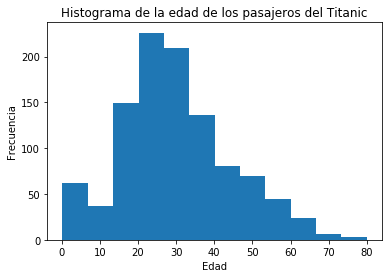

In [5]:
## Definimos el número de clases. ceil() redondea, int() convierte en número entero.
k = int(np.ceil(1 + np.log2(1046)))

## Graficamos el histograma
plt.hist(df_titanic["age"], bins = k) #bins = [0,30,60,...,180] si queremos utilizar intervalos prefijados.
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.title("Histograma de la edad de los pasajeros del Titanic")

Podemos observar que a bordo del Titanic las edades entre 15 y 40 años eran las más frecuentes.

#### 1.3.2. Diagramas de cajas o Boxplots

El Diagrama de Caja o Boxplot es un tipo de gráfico que muestra el resumen de una variable mediante cinco medidas descriptivas, además de intuir su morfología y simetría.

Este tipo de gráficos permite identificar valores atípicos y comparar distribuciones. Además de conocer de una forma cómoda y rápida como se distribuyen el 50% de los valores centrales.

- Caja: indica donde se encuentra la gran mayoría de los datos, el borde inferior de la caja muestra el percentil 25, y el superior el percentil 75; por lo que se puede inferir que la caja muestra el 50% de los datos. La raya amarilla indica el percentil 50, o la mediana. Por lo que la caja, me sirve para interpretar dónde se condensan los valores centrales. Si la mediana se sitúa en el centro de la caja entonces la distribución es simétrica y tanto la media, mediana y moda coinciden; si la mediana corta la caja en dos partes desiguales, la media será diferente a la mediana.


- Bigote: Habrá un límite superior, que no podrá superar el 1,5  veces el IQR, si el máximo no supera ese valor, la longitud del bigote será desde el tercer cuartil hasta el máximo. Habrá un límite inferior, que no podrá superar el 1,5  veces el IQR, si el mínimo no supera ese valor, la longitud del bigote será desde el primer cuartil hasta el mínimo.


- Outliers: Son aquellos valores que quedan por encima o debajo del máximo del bigote, es decir 1,5*IQR. Se reresentan con bolitas.

Para graficar el boxplot de una varibale utilizaremos la función de la libreria matplotlib `plt.boxplot()`.

Text(0.5, 1.0, 'Boxplot de las edades')

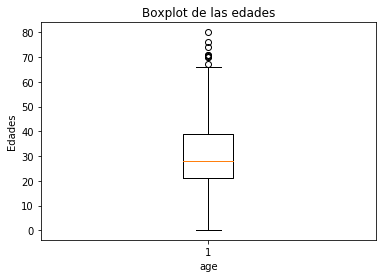

In [2]:
## Eliminamos lo NaN values de la columna age
age_not_nan = df_titanic["age"].dropna(axis = 0, how = "any")

## Graficamos el boxplot
plt.boxplot(age_not_nan)
plt.xlabel("age")
plt.ylabel("Edades")
plt.title("Boxplot de las edades")

In [26]:
df_titanic["age"].describe().round(2)

count    1046.00
mean       29.88
std        14.41
min         0.17
25%        21.00
50%        28.00
75%        39.00
max        80.00
Name: age, dtype: float64

Si comparamos el boxplot con los estadísticos descriptivos básicos de la columna "Age", vemos que los valores son coincidentes con lo que hemos explicado en el modelo:

- Parte inferior del boxplot: 1 cuartil $\rightarrow$ 21
- Parte superior del boxplot: 3 cuartil $\rightarrow$ 39
- Linea amarilla: mediana $\rightarrow$ 30

Para obtener el valor de los bigotes, solo tenemos que multiplicar el rango intercuartílico por 1,5. El IQR se puede calcular como la diferencia en valor absoluto entre los valores del percentil 75 y 25.

#### 1.3.3. Diagramas de dispersión o Scatter Plots

Un diagrama de dispersión o nube de puntos es un tipo de gráfico que utiliza las coordenadas cartesianas $(x, y)$ para mostrar los valores de dos variables pertenecientes a un conjunto de datos. El diagrama muestra estos pares como una nube de puntos.

La relación entre las dos variables analizadas se puede inferir a partir de la forma de las nubes. Entre sus usos está descubrir y mostrar las relaciones entre dos conjuntos asociados de datos y confirmar relaciones anticipadas entre ellos.

In [11]:
## Para este apartado vamos a cargar un fichero diferente
mainpath = "C:/Users/gmachin/Desktop/Developer/apuntes-notebooks/datasets"
filename = "/customer-churn-model/Customer Churn Model.txt"
fullpath = mainpath + "/" + filename

df_churn = pd.read_csv(fullpath)
df_churn.head(3)

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.


Para graficar el boxplot de una varibale utilizaremos la función `df.plot()` de la libreria `matplotlib`.

En el siguiente ejemplo tratamos de analizar la correlación entre el nivel de batería de un móvil, y el número de minutos de utilización del dispositivo en el día. Como se puede ver en el gráfico, las dos variables se relacionan mediante una recta, por lo que siguen una correlación lineal positiva, a mayor nivel de carga del dispositivo, mayor es el número de minutos de utilización del mismo.

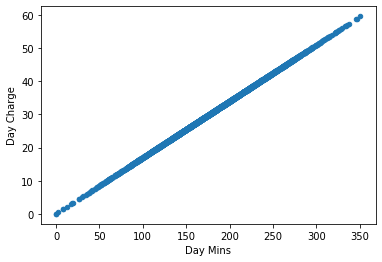

In [12]:
## Graficamos la variable minutos de llamada como la x, y el nivel de batería como la y:
df_churn.plot(kind = "scatter",
              x = "Day Mins",
              y = "Day Charge")

Podemos hacer el mismo ejercicio anterior pero comparando de forma cruzada diferentes variables, y de un vistazo analizar cuales de ellar guardan algún tipo de correlación y cuales no.

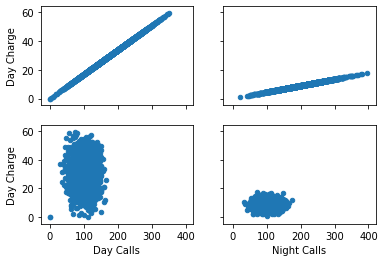

In [14]:
## Indicamos que queremos graficar una matriz de 2x2, donde cada posición de la matriz será un gráfico:
figure, axs = plt.subplots(2 ,2 , sharey = True, sharex = True)

## Indicamos que gráfico queremos en cada posición de la matriz:
df_churn.plot(kind = "scatter", x = "Day Mins", y = "Day Charge", ax = axs[0][0])
df_churn.plot(kind = "scatter", x = "Night Mins", y = "Night Charge", ax = axs[0][1])
df_churn.plot(kind = "scatter", x = "Day Calls", y = "Day Charge", ax = axs[1][0])
df_churn.plot(kind = "scatter", x = "Night Calls", y ="Night Charge", ax = axs[1][1])

Una buena idea cuando exploramos un dataset puede ser realizar una matriz de gráficos de dispersión cruzando las características cuantitativas del dataframe indicado, esto nos permite obtener de un vistazo que columnas guardan algún tipo de relación.

Para realizar este análisis, nos podemos valer de la función:

`pandas.plotting.scatter_matrix(frame, alpha=0.5, figsize=None, ax=None, grid=False, diagonal='hist', marker='.', density_kwds=None, hist_kwds=None, range_padding=0.05, **kwargs)`

- `frame`: DataFrame
- `alpha`: float, optional. Amount of transparency applied.
- `figsize`: (float,float), optional. A tuple (width, height) in inches.
- `ax`: Matplotlib axis object, optional.
- `grid`: boolean, optional. Setting this to True will show the grid.
- `diagonal`: {‘hist’, ‘kde’}. Pick between ‘kde’ and ‘hist’ for either Kernel Density Estimation or Histogram plot in the diagonal.
- `marker`: str, optional. Matplotlib marker type, default ‘.’.
- `density_kwds`: keywords. Keyword arguments to be passed to kernel density estimate plot.
- `hist_kwds`: keywords. Keyword arguments to be passed to hist function.
- `range_padding`: float, default 0.05. Relative extension of axis range in x and y with respect to (x_max - x_min) or (y_max - y_min).
- `kwargs`: Keyword arguments to be passed to scatter function.

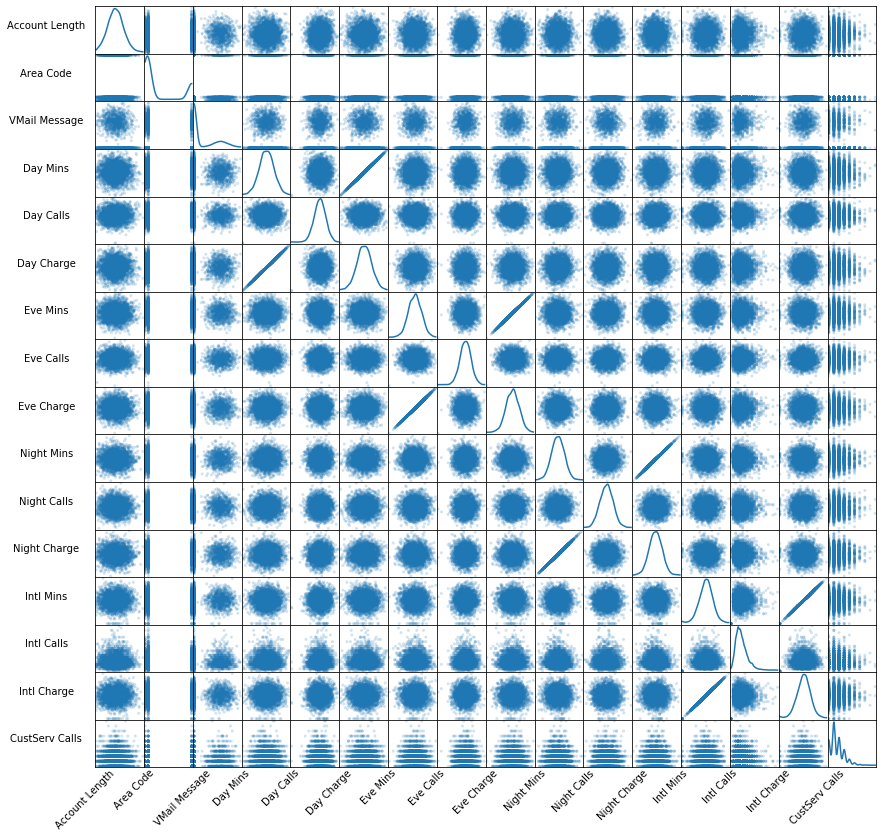

In [16]:
sm = pd.plotting.scatter_matrix(df_churn, alpha=0.2, figsize=(14, 14), diagonal='kde')

#Cambiamos la orientación de las etiquetas para que el gráfico sea legible
[s.xaxis.label.set_rotation(45) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]

#May need to offset label when rotating to prevent overlap of figure
[s.get_yaxis().set_label_coords(-1,0.5) for s in sm.reshape(-1)]
[s.get_xaxis().set_label_coords(-0.2,0) for s in sm.reshape(-1)]

#Ocultar ticks ticks
[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)];

## 2. Valores faltantes

Como hemos visto antes, dentro de un dataset podemos encontrarnos con valores que no estén informados, esto es lo que se denomina un missing values, y en Pandas se representa con el símbolo `NaN`.

Los valores que faltan en un data set pueden venir por dos razones:
* Error en la extracción de los datos
* Error en la recolección de los datos

Para lidiar con este problema, suele haber dos aproximaciones posibles en función del número de missing values:

- Eliminar la totalidad de aquellas filas o columnas que contengan missing values.
- Inferir el valor de los missing values con datos como la media, la mediana, el valor inmediatamente anterior...etc

### 2.1. Conteo de missing values

El primer paso para tratar con los valores `NaN`, es saber cuantos hay:

- ¿son muchos y podemos eliminar toda la fila o columna?
- ¿son pocos y podemos inferirlos?

Como hemos visto en puntos anteriores, podemos utiliza la función `df.info()` para obtener el número de valores no nulos de cada columna, pero también podemos apoyarnos en funciones como `df.isna()`, o `df.isnull()` para llevar a cabo esta tarea.

**`df.isna()`: Devuelve el DataFrame en formato booleano indicado si hay `NaN` (True) o no (False):**

>*El opuesto a esta función sería `df.notna()`.*

In [3]:
df_titanic.isna().head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,True,True,False
3,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,True,False


Una vez tenemos la matriz con valores booleanos acerca de si hay valores faltantes o no, podemos realizarle más preguntas como saber si hay algun `NaN` por columna, o sumar todos los `NaN` por columna.

In [76]:
df_titanic.isna().any()

pclass       False
survived     False
name         False
sex          False
age          False
sibsp        False
parch        False
ticket       False
fare          True
cabin         True
embarked      True
boat          True
body         False
home.dest    False
dtype: bool

In [77]:
df_titanic.isna().sum()

pclass          0
survived        0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body            0
home.dest       0
dtype: int64

**Missing values con valor diferente de `NaN`:**

Hay veces que no todos los dataset vienen con los datos ya trabajados y en el caso de missing values notificados con el valor `NaN`, si no que pueden venir con otros valores.

Para subsanar esta casuística podemos ayudarnos del parámetro `na_value` de la función `pd.read_csv()` e indicar mediante una lista los tipos de `NaN` que esperamos como puede ser ["?", "--", "#N/A"]; o utilizar la función `replace`.

In [9]:
## Definimos los valores de reemplazo mediante un diccionario
valores_reemplazar = {"?": np.nan,
                      "--": np.nan,
                      "#N/A": np.nan}

## Ejecutamos el reemplazo
df_titanic.replace(valores_reemplazar, inplace = True)

**Función tabla-resumen de missing values:**

In [10]:
def assess_NA(data):
    """
    Devuelve un dataframe de pandas indicando el numero total de NaN values y el porcentaje respecto del total para
    cada columna.
    
    El nombre de la variable es colocado en el index.
    
    Parámetros
    ----------
    data: dataframe
    """
    ## pandas series denoting features and the sum of their null values
    null_sum = data.isnull().sum() ## instantiate columns for missing data
    total = null_sum.sort_values(ascending = False)
    percent = ( ((null_sum / len(data.index)) * 100).round(2) ).sort_values(ascending=False)
    
    ## concatenate along the columns to create the complete dataframe
    df_NA = pd.concat([total, percent], axis = 1, keys = ['Number of NA', 'Percent NA'])
    
    ## drop rows that don't have any missing data; omit if you want to keep all rows
    df_NA = df_NA[(df_NA.T != 0).any()]
    
    return df_NA

df_NA = assess_NA(df_titanic)
df_NA

,Number of NA,Percent NA
body,1188,90.76
cabin,1014,77.46
boat,823,62.87
home.dest,564,43.09
age,263,20.09
embarked,2,0.15
fare,1,0.08


### 2.2. Borrado de missing values

En el caso de que optemos por eliminar la totalidad de una fila o columna, podemos utilizar la función `df.dropna()`. Esta función tiene los siguientes parámetros:

- `axis`: indica si trabajamos en vertical u horizontal. 0: borra filas; 1: borra columnas.
- `how`: indica en que filas hay que trabajar. `all`: si todas las columnas tienen valores `NaN` o `NULL`; `any`: borra la fila o columna con que haya una única columna que tenga un missing value.

In [78]:
df_titanic.shape

(1309, 14)

In [52]:
## En este caso, como no hay ninguna fila que tenga todos los valores con NaN, no elimina ninguna.
df_titanic_not_nan = df_titanic.dropna(axis = 0, how = "all")
df_titanic_not_nan.shape

(1309, 14)

In [51]:
## En este caso, como todas las filas tienen algun valor NaN, elimina todas las columnas.
df_titanic_not_nan = df_titanic.dropna(axis = 0, how = "any")
df_titanic_not_nan.shape

(0, 14)

In [53]:
## En este caso, como no hay ninguna columna que tenga todos los valores con NaN, no elimina ninguna.
df_titanic_not_nan = df_titanic.dropna(axis = 1, how = "all")
df_titanic_not_nan.shape

(1309, 14)

In [55]:
## En este caso, como hay algunas columnas que tienen uno de sus valores NaN, elimina toda la columna.
df_titanic_not_nan = df_titanic.dropna(axis = 1, how = "any")
df_titanic_not_nan.shape

(1309, 7)

### 2.3. Imputación de missing values

Cuando tenemos valores faltantes, existe una alternativa a eliminarlos, que es inferir su valor, ya sea de manera fija o en base a una metodología definidad. Las opciones más comunes suelen ser:

- A ceros: 0
- Con un string fijo: "N/A"
- Promedio del resto de valores
- Con valores numéricos circundantes

Saber qué camino tomar al manejar missing values está en gran medida marcado por el conocimiento y lo que su intuición le dice sobre los datos. Esto se obtiene paso a paso, y trabajando con conjuntos de datos que le permiten hacer preguntas significativas sobre ellos.

Para llevar a cabo esta tarea nos apoyaremos en la funcion `df.fillna()`.

**Completar con el valor "0":**

In [63]:
df_titanic_fill_na = df_titanic
df_titanic_fill_na = df_titanic_fill_na.fillna(0)
df_titanic_fill_na.head(3)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,0.0,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,0.0,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,0,0.0,"Montreal, PQ / Chesterville, ON"


**Completar con un string:**

In [64]:
df_titanic_fill_na = df_titanic
df_titanic_fill_na = df_titanic_fill_na.fillna("Desconocido")
df_titanic_fill_na.head(3)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.338,B5,S,2,Desconocido,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,Desconocido,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,Desconocido,Desconocido,"Montreal, PQ / Chesterville, ON"


**Completar con reglas diferentes por cada columna:**

In [67]:
df_titanic_fill_na = df_titanic

## body se completa con el valor int 0
df_titanic_fill_na["body"] = df_titanic_fill_na["body"].fillna(0) 

## home.dest se completa con el valor string "Desconocido"
df_titanic_fill_na["home.dest"] = df_titanic_fill_na["home.dest"].fillna("Desconocido")


df_titanic_fill_na.head(3)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,0.0,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,0.0,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,0.0,"Montreal, PQ / Chesterville, ON"


**Completar en base a la media del resto de valores de la columna:**

In [72]:
df_titanic_fill_na = df_titanic
df_titanic_fill_na["age"] = df_titanic_fill_na["age"].fillna(df_titanic_fill_na["age"].mean())
df_titanic_fill_na.head(3)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.881135,0,0,24160,211.3375,B5,S,2,0.0,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,29.881135,1,2,113781,151.5500,C22 C26,S,11,0.0,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,29.881135,1,2,113781,151.5500,C22 C26,S,NaN,0.0,"Montreal, PQ / Chesterville, ON"


**Completar en base al valor inmediatamente anterior o posterior dentro de la columna:**

In [ ]:
## Completar con el valor inmediatamente siguiente (forwardfill)
df_titanic_fill_na["age"] = df_titanic_fill_na["age"].fillna(method="ffill")

## Completar con el valor inmediatamente anterior (backfill)
df_titanic_fill_na["age"] = df_titanic_fill_na["age"].fillna(method="backfill")

## 3. Estilizar DataFrames

Otra forma muy útil y visual de realizar análisis exploratorios, o incluso de presentar los datos planos de una forma un poco más interactiva, es darle formato a los dataframes.

De este modo podemos resaltar los valores máximos, poner en rojo los importes negativos...etc.

In [10]:
## Creamos un dataframe con datos aleatorios

df = pd.DataFrame({'A':np.linspace(1, 8, 8),
                   'B':np.random.random(8),
                   'C':np.random.randn(8),
                   'D':np.random.randn(8),
                   'E':np.random.randint(-5, 5, 8)})

df.iloc[[1,5],[1,3]] = np.nan
df

,A,B,C,D,E
0,1.0,0.715678,0.992523,-1.695329,4
1,2.0,NaN,0.131144,NaN,-5
2,3.0,0.228740,-0.565318,-1.124192,2
3,4.0,0.200839,-0.403461,0.545555,0
4,5.0,0.533258,-0.269181,-0.932910,0
5,6.0,NaN,-0.329546,NaN,-3
6,7.0,0.690870,0.930706,-0.185995,4
7,8.0,0.195821,-0.717375,-0.457414,1


Para estilizar un dataframe se puede utilizar la función `df.style.applymap(function)` donde `function` es una función definida por nosotros.

In [11]:
## Colorear en rojo valores negativos

def color_negative_values(val):
  color = 'red' if val < 0 else 'black'
  return 'color: %s' % color

df.style.applymap(color_negative_values)

,A,B,C,D,E
0,1.000000,0.715678,0.992523,-1.695329,4
1,2.000000,nan,0.131144,nan,-5
2,3.000000,0.228740,-0.565318,-1.124192,2
3,4.000000,0.200839,-0.403461,0.545555,0
4,5.000000,0.533258,-0.269181,-0.932910,0
5,6.000000,nan,-0.329546,nan,-3
6,7.000000,0.690870,0.930706,-0.185995,4
7,8.000000,0.195821,-0.717375,-0.457414,1


In [12]:
## Resalta en azul el valor máximo de cada columna

def color_max(s):
    is_max = s == s.max()
    return ['background-color: lightblue' if v else '' for v in    is_max]

df.style.apply(color_max)

,A,B,C,D,E
0,1.000000,0.715678,0.992523,-1.695329,4
1,2.000000,nan,0.131144,nan,-5
2,3.000000,0.228740,-0.565318,-1.124192,2
3,4.000000,0.200839,-0.403461,0.545555,0
4,5.000000,0.533258,-0.269181,-0.932910,0
5,6.000000,nan,-0.329546,nan,-3
6,7.000000,0.690870,0.930706,-0.185995,4
7,8.000000,0.195821,-0.717375,-0.457414,1


In [13]:
## Combinar las dos funciones anteriores

df.style.applymap(color_negative_values).apply(color_max)

,A,B,C,D,E
0,1.000000,0.715678,0.992523,-1.695329,4
1,2.000000,nan,0.131144,nan,-5
2,3.000000,0.228740,-0.565318,-1.124192,2
3,4.000000,0.200839,-0.403461,0.545555,0
4,5.000000,0.533258,-0.269181,-0.932910,0
5,6.000000,nan,-0.329546,nan,-3
6,7.000000,0.690870,0.930706,-0.185995,4
7,8.000000,0.195821,-0.717375,-0.457414,1


In [14]:
## Resaltar missing values

df.style.highlight_null(null_color = 'yellow')

,A,B,C,D,E
0,1.000000,0.715678,0.992523,-1.695329,4
1,2.000000,nan,0.131144,nan,-5
2,3.000000,0.228740,-0.565318,-1.124192,2
3,4.000000,0.200839,-0.403461,0.545555,0
4,5.000000,0.533258,-0.269181,-0.932910,0
5,6.000000,nan,-0.329546,nan,-3
6,7.000000,0.690870,0.930706,-0.185995,4
7,8.000000,0.195821,-0.717375,-0.457414,1
